## <font color=blue> Melanoma Image Classification using CNN </font> - by Sankalp Gupta

<font color=blue> Problem statement: </font> To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

<font color=blue> Instructions: </font>
- Importing Skin Cancer Data
- To do: Take necessary actions to read the data
- Importing all the important libraries

#### <font color=blue> Step 0: </font> Connect to the Github repository to access data files

In [1]:
#This is required to clone the data files from github into google colab.
#This has to be executed everytime, as google colab runtime does not store data files, once the program session is removed
!git clone https://github.com/sagupta153/melanoma_identification

Cloning into 'melanoma_identification'...
remote: Enumerating objects: 2245, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 2245 (delta 6), reused 20 (delta 5), pack-reused 2224
Receiving objects: 100% (2245/2245), 752.94 MiB | 17.70 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (2358/2358), done.


In [2]:
#Verify the present working directory. This helps in setting the path for the image data files
!pwd

/content


In [3]:
#This is the parent folder where the program and data files are stored. 
parent_path = '/content/melanoma_identification'     #Use this when executing the program on google colab
#parent_path = '.'                                   #Use this when executing the program on local PC

#### <font color=blue> Step 1: </font> Import necessary libraries

In [4]:
import os, pathlib, glob, shutil

import numpy as np, pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras

<font color=blue> Notes: </font>
- This assignment uses a dataset of about 2357 images of skin cancer types.
- The dataset contains 9 sub-directories in each train and test subdirectories.
- The 9 sub-directories contains the images of 9 skin cancer types respectively.

#### <font color=blue> Step 2: </font> Connect with the Image Data directory

In [5]:
#Set the path where the image data files will be found
data_path  = parent_path + '/melanomas'

train_path = data_path + '/Train'
test_path  = data_path + '/Test'

In [6]:
#This is just to ensure that the program does not crash in case the image files folder is not set properly
def crete_dir_if_not_existing (f):
    if not os.path.exists(f):
        print ('Dir ' + f + ' does not exist. Creating one')
        os.mkdir(f)
    else:
        print ('Dir ' + f + ' exists')

In [7]:
#Create directories if they do not exist - This is done to prevent the program from crashing
crete_dir_if_not_existing(data_path)
crete_dir_if_not_existing(train_path)
crete_dir_if_not_existing(test_path)

Dir /content/melanoma_identification/melanomas exists
Dir /content/melanoma_identification/melanomas/Train exists
Dir /content/melanoma_identification/melanomas/Test exists


In [8]:
#Initialise the path class corresponding to the path-string for image data files
train_dir = pathlib.Path(train_path)
test_dir  = pathlib.Path(test_path)

In [9]:
#Count the number of image files
image_count_train = len(list(train_dir.glob('*/*.jpg')))
image_count_test  = len(list(test_dir.glob('*/*.jpg')))

print("Number of Training Images: ", f"{image_count_train:>4}")
print("Number of Test     Images: ", f"{image_count_test:>4}")
print('-'*32)
print("Total Number of    Images: ", f"{(image_count_train + image_count_test):>4}")

Number of Training Images:  2239
Number of Test     Images:   118
--------------------------------
Total Number of    Images:  2357


#### <font color=blue> Step 3: </font> Load images using image_dataset_from_directory utility from keras.preprocessing

<font color=blue> Instructions: </font>
- Write your train dataset here
- Use 80% of the images for training, and 20% for validation.
- Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
- Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

In [10]:
#This keras utility is a convenient way of loading image files
from tensorflow.keras.utils import image_dataset_from_directory

In [11]:
batch_size = 32
img_height, img_width = 180, 180

In [12]:
#Creating Training Dataset - 80% of the images used for training
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
#Creating Validation Dataset - 20% of the images used for validation
val_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


<font color=blue> Instructions: </font>
- List out all the classes of skin cancer and store them in a list. 
- You can find the class names in the class_names attribute on these datasets. 
- These correspond to the directory names in alphabetical order.

In [14]:
#Save all the class names in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### <font color=blue> Step 4: </font> Visualize one sample image for each class

<font color=blue> Instructions: </font>
- Visualize the data
- Todo, create a code to visualize one instance of all the nine classes present in the dataset
- your code goes here, you can use training or validation data to visualize

In [15]:
#Check the number of classes
num_classes = len (class_names)
num_classes

9

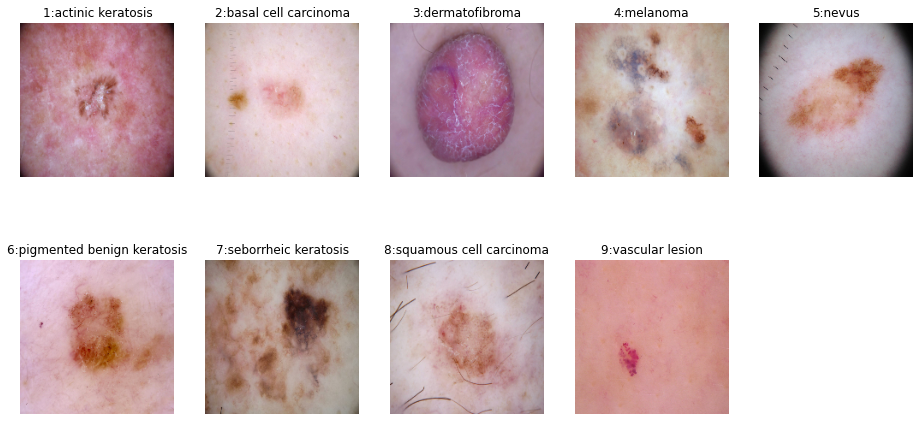

In [16]:
#Display one image from each of the classes
plt.figure(figsize=(16, 8))

for i in range(num_classes):
    class_ds = train_ds.filter(lambda _, l: tf.math.equal(l[0], i))
    ax = plt.subplot(2, 5, i+1)
    
    for image, label in class_ds.take(1):    
        plt.imshow(image[0].numpy().astype('uint8'))
        
        l = label.numpy()[0]
        title_str = str (l+1) + ':' + class_names[l]
        plt.title(title_str)
        
        plt.axis('off')

#### <font color=blue> Step 5: </font> Visualize Class imbalance

In [17]:
#Count the number of images in each class
counts = []
for c in class_names:
    class_dir  = pathlib.Path(train_path + '/' + c)
    class_count = len(list(class_dir.glob('*.jpg')))
    counts.append (class_count)

In [18]:
#Convert the counts to % value
counts = np.array (counts) * 100 / np.sum (counts)

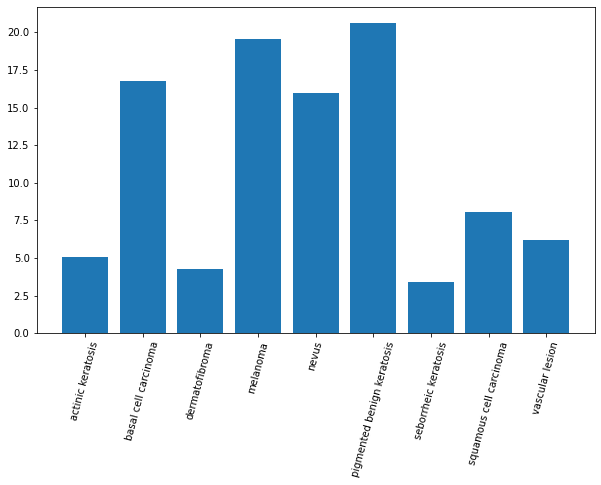

In [19]:
#Display % of data from each class
plt.figure(figsize=(10, 6))

plt.bar (class_names, counts)
plt.xticks (rotation=75)
plt.show()

#### <font color=blue> Step 6: </font> Build CNN Model

<font color=blue> Notes: </font>
- The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

- Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<font color=blue> Instructions: </font>
- Create the model
- Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. 
- Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 
- The RGB channel values are in the [0, 255] range. 
- This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

##### <font color=blue> Import Keras libraries for CNN Model building

In [21]:
from keras import layers
from keras.models import Sequential, Model, load_model

In [22]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import L2

##### <font color=blue> Define a function to visualize model results

In [23]:
def visualize_results (history, epochs):
    epochs_range = range(epochs)
    plt.figure(figsize=(16, 8))

    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc,      label='Training Accuracy')
    plt.plot(epochs_range, val_acc,  label='Validation Accuracy')
    plt.xlabel ('Epoch')
    plt.ylabel ('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss,     label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel ('Epoch')
    plt.ylabel ('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [24]:
#define a function to build the model
def get_model (bn=False, dropout=False, lc2=False, features_256=False):
    model = Sequential()
    model.add(Rescaling(1.0/255, input_shape=(180,180,3)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (180,180,3)))
    if bn: model.add(BatchNormalization());
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout: model.add(Dropout(0.25))

    model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout: model.add(Dropout(0.25))

    if features_256:
        model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same', activation ='relu'))
        if bn: model.add(BatchNormalization());
        model.add(Conv2D(filters =256, kernel_size = (3,3), padding = 'Same', activation ='relu'))
        if bn: model.add(BatchNormalization());
        model.add(MaxPooling2D(pool_size=(2,2)))
        if dropout: model.add(Dropout(0.25))

    model.add(Flatten())
    if lc2:
        model.add(Dense(512, kernel_regularizer=L2(0.01)))
    else:
        model.add(Dense(512))
    model.add(Activation('relu'))
    if dropout: model.add(Dropout(0.50))
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model

##### <font color=brown> Model 1: </font> 4 Conv layers, 2 Maxpool, 1 Dense, 1 Output-Softmax Layer

In [25]:
#Build the model
model = get_model()

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                        

In [26]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 36s 228ms/step - loss: 2.0438 - accuracy: 0.2031 - val_loss: 2.0224 - val_accuracy: 0.2394
Epoch 2/20
56/56 [==============================] - 10s 170ms/step - loss: 2.0170 - accuracy: 0.2182 - val_loss: 1.9998 - val_accuracy: 0.2327
Epoch 3/20
56/56 [==============================] - 10s 171ms/step - loss: 1.9860 - accuracy: 0.2706 - val_loss: 1.9409 - val_accuracy: 0.3333
Epoch 4/20
56/56 [==============================] - 10s 172ms/step - loss: 1.9536 - accuracy: 0.2969 - val_loss: 1.9209 - val_accuracy: 0.3423
Epoch 5/20
56/56 [==============================] - 10s 173ms/step - loss: 1.9324 - accuracy: 0.2946 - val_loss: 1.8424 - val_accuracy: 0.3535
Epoch 6/20
56/56 [==============================] - 10s 174ms/step - loss: 1.8902 - accuracy: 0.3080 - val_loss: 1.7913 - val_accuracy: 0.3714
Epoch 7/20
56/56 [==============================] - 10s 174ms/step - loss: 1.8568 - accuracy: 0.3198 - val_loss: 1.7932 - val_accuracy: 0.3199

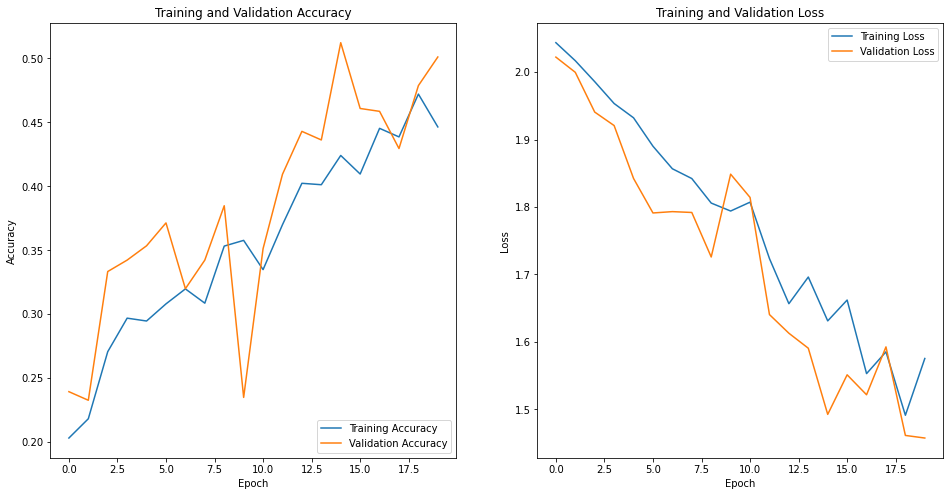

In [27]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=brown> Model 2: </font> Added Batch Normalization after each Conv layer

In [28]:
#Build the model
model = get_model(bn=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 64)      

In [29]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 17s 292ms/step - loss: 7.0145 - accuracy: 0.3030 - val_loss: 6.4554 - val_accuracy: 0.1454
Epoch 2/20
56/56 [==============================] - 12s 210ms/step - loss: 1.4732 - accuracy: 0.4676 - val_loss: 7.6840 - val_accuracy: 0.1409
Epoch 3/20
56/56 [==============================] - 12s 209ms/step - loss: 1.1434 - accuracy: 0.5882 - val_loss: 5.1020 - val_accuracy: 0.1320
Epoch 4/20
56/56 [==============================] - 12s 211ms/step - loss: 0.9190 - accuracy: 0.6763 - val_loss: 6.1097 - val_accuracy: 0.1812
Epoch 5/20
56/56 [==============================] - 12s 212ms/step - loss: 0.6855 - accuracy: 0.7455 - val_loss: 4.6784 - val_accuracy: 0.2550
Epoch 6/20
56/56 [==============================] - 12s 210ms/step - loss: 0.5604 - accuracy: 0.7907 - val_loss: 3.6828 - val_accuracy: 0.3087
Epoch 7/20
56/56 [==============================] - 12s 209ms/step - loss: 0.3674 - accuracy: 0.8677 - val_loss: 3.3942 - val_accuracy: 0.3535

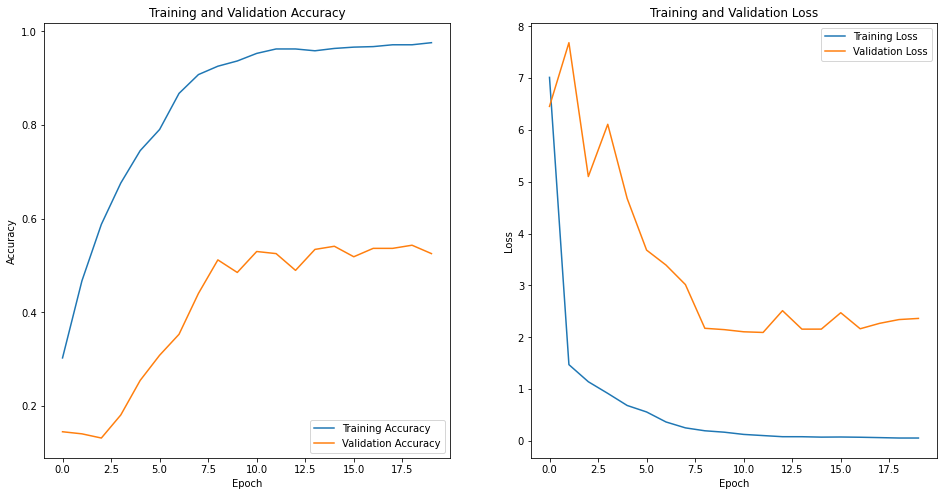

In [30]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=brown> Model 3: </font> Add Dropouts - to remove overfitting

In [31]:
#Build the model
model = get_model(bn=True, dropout=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_4 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_5 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)      

In [32]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 13s 217ms/step - loss: 15.2959 - accuracy: 0.2042 - val_loss: 15.3231 - val_accuracy: 0.2013
Epoch 2/20
56/56 [==============================] - 12s 216ms/step - loss: 2.1193 - accuracy: 0.2941 - val_loss: 15.8352 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 12s 216ms/step - loss: 1.9071 - accuracy: 0.3733 - val_loss: 13.4108 - val_accuracy: 0.2148
Epoch 4/20
56/56 [==============================] - 12s 215ms/step - loss: 1.7465 - accuracy: 0.4090 - val_loss: 10.9349 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 12s 214ms/step - loss: 1.6422 - accuracy: 0.4297 - val_loss: 6.2965 - val_accuracy: 0.2998
Epoch 6/20
56/56 [==============================] - 12s 214ms/step - loss: 1.5225 - accuracy: 0.4760 - val_loss: 6.3612 - val_accuracy: 0.2864
Epoch 7/20
56/56 [==============================] - 12s 216ms/step - loss: 1.4733 - accuracy: 0.4838 - val_loss: 2.5459 - val_accuracy: 0

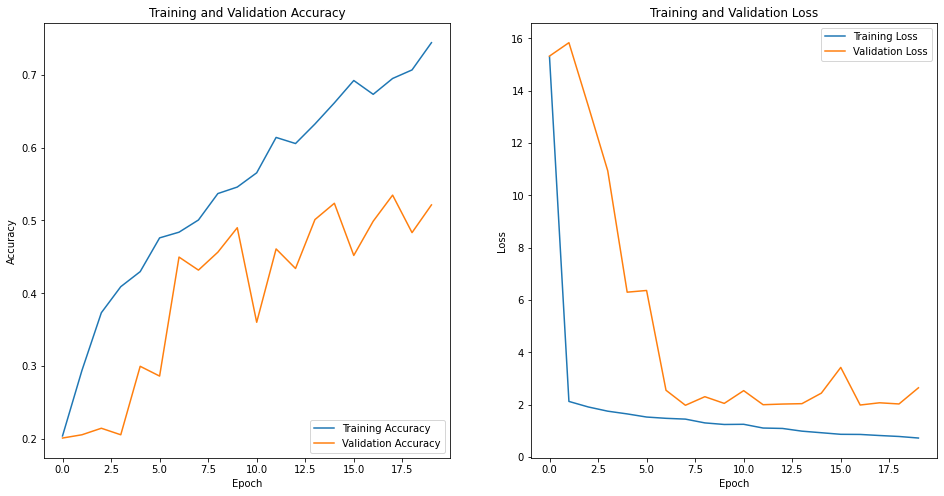

In [33]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=brown> Model 4: </font> Add LC2 regularizer

In [34]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_9 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 64)      

In [35]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
56/56 [==============================] - 15s 245ms/step - loss: 42.4894 - accuracy: 0.2176 - val_loss: 34.8047 - val_accuracy: 0.1902
Epoch 2/20
56/56 [==============================] - 14s 242ms/step - loss: 13.5248 - accuracy: 0.2801 - val_loss: 14.9536 - val_accuracy: 0.1723
Epoch 3/20
56/56 [==============================] - 14s 242ms/step - loss: 12.5079 - accuracy: 0.3482 - val_loss: 13.9428 - val_accuracy: 0.2215
Epoch 4/20
56/56 [==============================] - 14s 243ms/step - loss: 11.9942 - accuracy: 0.3834 - val_loss: 14.1718 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 14s 243ms/step - loss: 11.5601 - accuracy: 0.4648 - val_loss: 12.9405 - val_accuracy: 0.3356
Epoch 6/20
56/56 [==============================] - 14s 243ms/step - loss: 11.1767 - accuracy: 0.5084 - val_loss: 12.4417 - val_accuracy: 0.3378
Epoch 7/20
56/56 [==============================] - 14s 243ms/step - loss: 10.8860 - accuracy: 0.5379 - val_loss: 11.8323 - val_ac

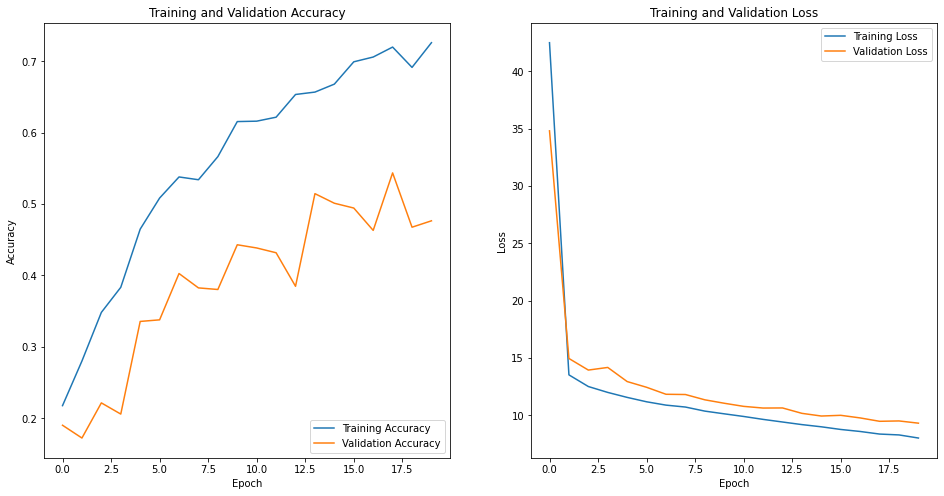

In [36]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Instructions: </font>
- Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Write your findings here

- Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
- Your code goes here
- Todo, visualize how your augmentation strategy works for one instance of training image.
- Your code goes here

<font color=blue> Todo: </font> Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

##### <font color=brown> Model 5: </font> Using Augmentor to create an enhanced dataset

<font color=blue> 1. </font> Install and import Augmentor

In [37]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import Augmentor

<font color=blue> 2. </font> Remove 'output' folders created during any previous execution of this program 

In [39]:
#Removing output folders from previous execution 
for c in class_names:
    f = train_path + '/' + c + '/output' 
    if os.path.exists(f):
        print ('Dir ' + f + ' exists from previous program execution. Removing the same')
        for root, dirs, files in os.walk(f, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))
    else:
        print ('Dir ' + f + ' does not exist from previous program execution.')

Dir /content/melanoma_identification/melanomas/Train/actinic keratosis/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/basal cell carcinoma/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/dermatofibroma/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/melanoma/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/nevus/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/pigmented benign keratosis/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/seborrheic keratosis/output does not exist from previous program execution.
Dir /content/melanoma_identification/melanomas/Train/squamous cell carcinoma/output does not exist from previous program execut

<font color=blue> 3. </font> Create and execute Augmentor pipeline 

<font color=blue> Note: </font> 
To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [40]:
for i in class_names:
    p = Augmentor.Pipeline(train_path + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7C1A11E90>: 100%|██████████| 500/500 [00:18<00:00, 26.90 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD7C1D8DD50>: 100%|██████████| 500/500 [00:19<00:00, 25.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD96EE35950>: 100%|██████████| 500/500 [00:20<00:00, 24.52 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD7C19ECB90>: 100%|██████████| 500/500 [01:34<00:00,  5.28 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7FD7C19F54D0>: 100%|██████████| 500/500 [01:21<00:00,  6.14 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7C19F7A50>: 100%|██████████| 500/500 [00:16<00:00, 30.68 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD7C1A90BD0>: 100%|██████████| 500/500 [00:38<00:00, 13.04 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7C1E66050>: 100%|██████████| 500/500 [00:17<00:00, 28.84 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/melanoma_identification/melanomas/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD7C1E79CD0>: 100%|██████████| 500/500 [00:16<00:00, 30.13 Samples/s]


<font color=blue> Note: </font> 
Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

<font color=blue> Note: </font> 
Lets see the distribution of augmented data after adding new images to the original training data.

<font color=blue> 4. </font> Check class imbalance after augmentation

In [41]:
counts = []
for c in class_names:
    class_dir1  = pathlib.Path(train_path + '/' + c)
    class_dir2  = pathlib.Path(train_path + '/' + c + '/output')
    class_count = len(list(class_dir1.glob('*.jpg'))) + len(list(class_dir2.glob('*.jpg')))
    counts.append (class_count)

In [42]:
counts = np.array (counts) * 100 / np.sum (counts)

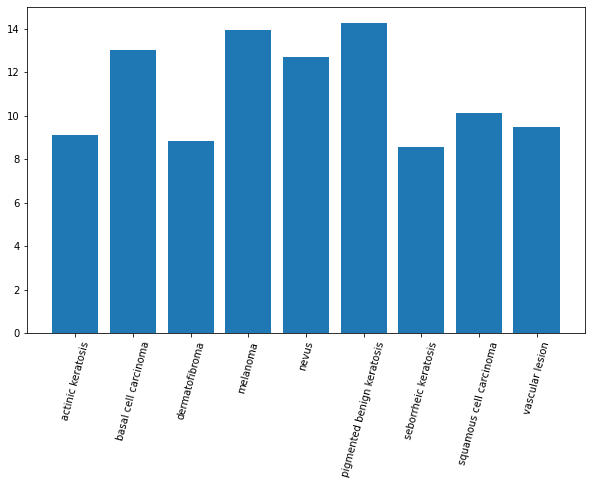

In [43]:
#Display % of data from each class
plt.figure(figsize=(10, 6))

plt.bar (class_names, counts)
plt.xticks (rotation=75)
plt.show()

<font color=blue> Instructions: </font>
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Todo: Train the model on the data created using Augmentor

<font color=blue> 5. </font> Re-create Training and Validation datasets, including the newly created images

In [44]:
#Creating Training Dataset - 80% of the images used for training
train_ds_aug = image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [45]:
#Creating Validation Dataset - 20% of the images used for validation
val_ds_aug = image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<font color=blue> 6. </font> Build and Test the model 

In [46]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_12 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_13 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 64)      

In [47]:
#Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/30
56/56 [==============================] - 15s 245ms/step - loss: 32.6689 - accuracy: 0.2059 - val_loss: 17.5076 - val_accuracy: 0.1499
Epoch 2/30
56/56 [==============================] - 13s 241ms/step - loss: 12.8776 - accuracy: 0.3198 - val_loss: 16.2613 - val_accuracy: 0.1812
Epoch 3/30
56/56 [==============================] - 13s 234ms/step - loss: 12.3767 - accuracy: 0.3259 - val_loss: 17.0839 - val_accuracy: 0.2036
Epoch 4/30
56/56 [==============================] - 13s 236ms/step - loss: 11.8814 - accuracy: 0.3772 - val_loss: 16.2081 - val_accuracy: 0.2125
Epoch 5/30
56/56 [==============================] - 13s 237ms/step - loss: 11.4963 - accuracy: 0.4085 - val_loss: 15.0092 - val_accuracy: 0.2416
Epoch 6/30
56/56 [==============================] - 13s 237ms/step - loss: 11.1874 - accuracy: 0.4414 - val_loss: 13.8382 - val_accuracy: 0.2864
Epoch 7/30
56/56 [==============================] - 13s 238ms/step - loss: 10.8475 - accuracy: 0.4927 - val_loss: 12.2917 - val_ac

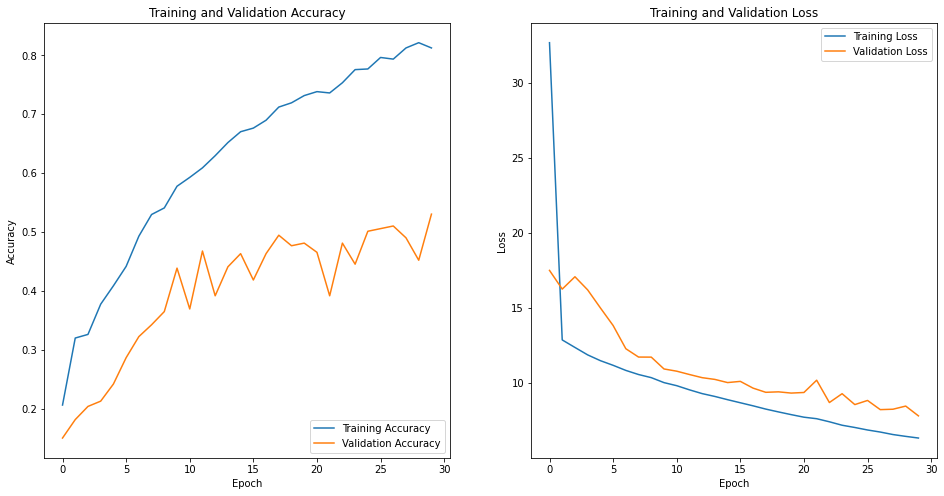

In [48]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=brown> Model 6: </font> Add an additional block for 256 features

In [49]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True, features_256=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_16 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_17 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 64)      

In [50]:
#Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/30
56/56 [==============================] - 21s 330ms/step - loss: 18.3094 - accuracy: 0.2394 - val_loss: 13.9904 - val_accuracy: 0.1499
Epoch 2/30
56/56 [==============================] - 16s 285ms/step - loss: 11.8475 - accuracy: 0.3806 - val_loss: 14.7189 - val_accuracy: 0.1521
Epoch 3/30
56/56 [==============================] - 16s 285ms/step - loss: 11.5221 - accuracy: 0.4275 - val_loss: 15.6844 - val_accuracy: 0.1946
Epoch 4/30
56/56 [==============================] - 16s 283ms/step - loss: 11.1893 - accuracy: 0.4587 - val_loss: 15.7120 - val_accuracy: 0.1902
Epoch 5/30
56/56 [==============================] - 16s 287ms/step - loss: 10.8207 - accuracy: 0.5173 - val_loss: 15.9514 - val_accuracy: 0.1767
Epoch 6/30
56/56 [==============================] - 16s 290ms/step - loss: 10.5785 - accuracy: 0.5246 - val_loss: 14.4856 - val_accuracy: 0.2058
Epoch 7/30
56/56 [==============================] - 16s 286ms/step - loss: 10.2594 - accuracy: 0.5558 - val_loss: 13.1807 - val_ac

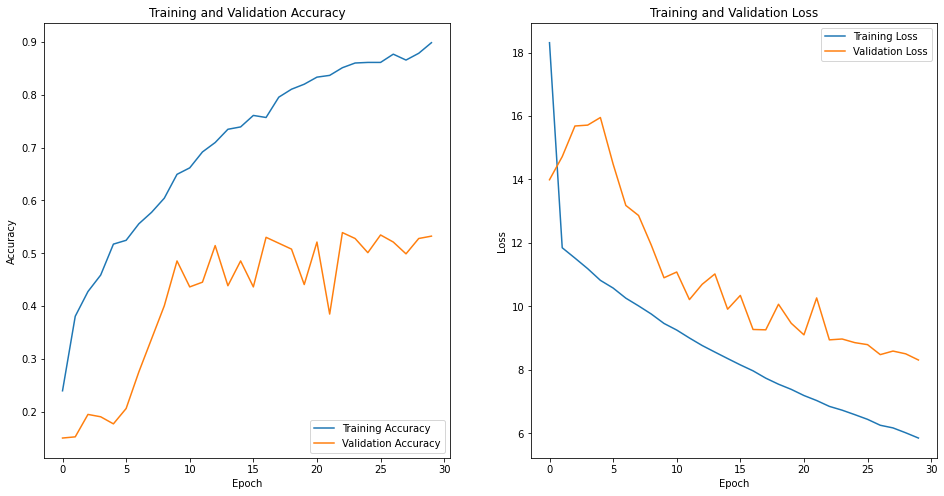

In [51]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=brown> Model 7: </font> The previous model with 50 epochs

In [52]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True, features_256=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_22 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_23 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 90, 90, 64)      

In [53]:
#Train the model
epochs = 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/50
56/56 [==============================] - 17s 290ms/step - loss: 20.0275 - accuracy: 0.2333 - val_loss: 16.7471 - val_accuracy: 0.1499
Epoch 2/50
56/56 [==============================] - 16s 284ms/step - loss: 12.0809 - accuracy: 0.3008 - val_loss: 19.2194 - val_accuracy: 0.1499
Epoch 3/50
56/56 [==============================] - 16s 282ms/step - loss: 11.6447 - accuracy: 0.3756 - val_loss: 16.9085 - val_accuracy: 0.1588
Epoch 4/50
56/56 [==============================] - 16s 283ms/step - loss: 11.3160 - accuracy: 0.4247 - val_loss: 15.6398 - val_accuracy: 0.1678
Epoch 5/50
56/56 [==============================] - 16s 286ms/step - loss: 10.9787 - accuracy: 0.4699 - val_loss: 15.6258 - val_accuracy: 0.2013
Epoch 6/50
56/56 [==============================] - 16s 290ms/step - loss: 10.6300 - accuracy: 0.5022 - val_loss: 14.3670 - val_accuracy: 0.2394
Epoch 7/50
56/56 [==============================] - 16s 290ms/step - loss: 10.3558 - accuracy: 0.5363 - val_loss: 13.3303 - val_ac

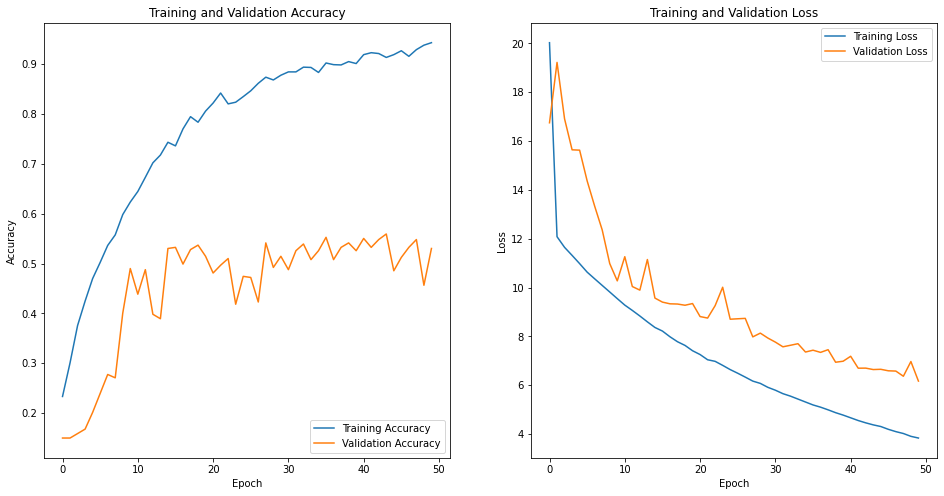

In [54]:
#Visualize the model results
visualize_results (history, epochs)

#### <font color=blue> Step 7: </font> Evaluate the model on the test dataset

In [55]:
#Creating Validation Dataset - 20% of the images used for validation
eval_ds = image_dataset_from_directory(
    test_dir,
    class_names = class_names,
    color_mode  =  'rgb',
    batch_size  = batch_size, # not really applicable as I want to use the whole set?
    image_size  = (img_height, img_width),
    shuffle     = True,
    seed        = 123,
    validation_split = None
)

Found 118 files belonging to 9 classes.


In [57]:
test_loss, test_acc = model.evaluate (eval_ds, verbose=2)
print('\nTest accuracy:', test_acc)

4/4 - 8s - loss: 8.9102 - accuracy: 0.3559 - 8s/epoch - 2s/step

Test accuracy: 0.35593220591545105
